In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tyagi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%matplotlib inline

In [4]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')

In [5]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [40]:
training.shape

(60000, 785)

In [41]:
import random

0.0

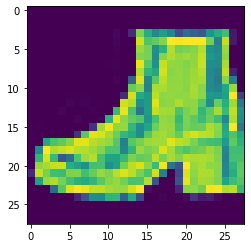

In [42]:
i = random.randint(0,60001) 
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1] 
label

**i** = random.randint(0,60001)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,1] 
label

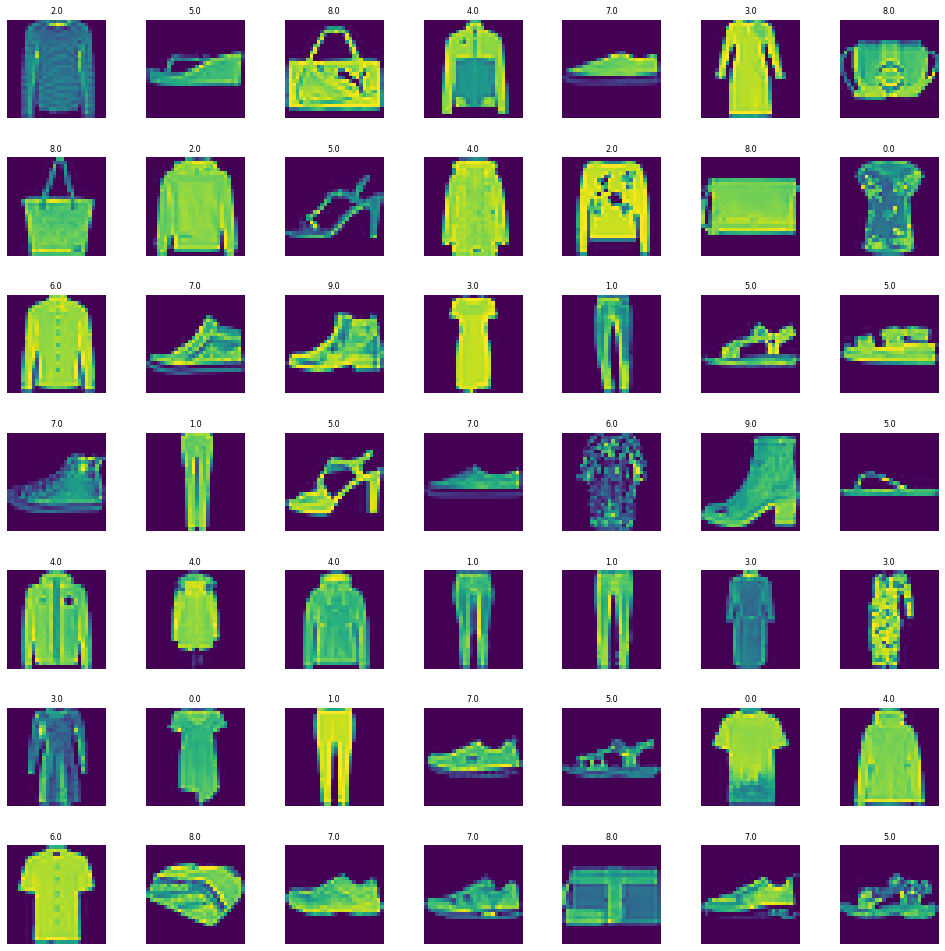

In [13]:
W_grid = 7
L_grid = 7

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() 
n_training = len(training) 



for i in np.arange(0,W_grid*L_grid):
        index = np.random.randint(0,n_training)
        axes[i].imshow(training[index,1:].reshape((28,28)))
        axes[i].set_title(training[index,0],fontsize = 8)
        axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)  

In [44]:
X_train = training[:,1:]/255
print(X_train)
y_train = training[:,0]
print(y_train)
X_test = testing[:,1:]/255
print(X_test)
y_test = testing[:,0]
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2. 9. 6. ... 8. 8. 7.]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.00392157 0.        ]
 [0.         0.00392157 0.01176471 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0. 1. 2. ... 8. 8. 1.]


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 

In [46]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [47]:
X_train.shape


(48000, 28, 28, 1)

In [48]:
X_test.shape

(10000, 28, 28, 1)

In [49]:
X_validate.shape

(12000, 28, 28, 1)

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [55]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])


In [56]:
epochs = 200


In [57]:

cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/200
94/94 [==============================] - 6s 40ms/step - loss: 1.4287 - accuracy: 0.5486 - val_loss: 0.8504 - val_accuracy: 0.7151
Epoch 2/200
94/94 [==============================] - 3s 34ms/step - loss: 0.7336 - accuracy: 0.7426 - val_loss: 0.6619 - val_accuracy: 0.7623
Epoch 3/200
94/94 [==============================] - 3s 33ms/step - loss: 0.6227 - accuracy: 0.7767 - val_loss: 0.5925 - val_accuracy: 0.7866
Epoch 4/200
94/94 [==============================] - 3s 33ms/step - loss: 0.5738 - accuracy: 0.7924 - val_loss: 0.5658 - val_accuracy: 0.7951
Epoch 5/200
94/94 [==============================] - 2s 24ms/step - loss: 0.5410 - accuracy: 0.8055 - val_loss: 0.5289 - val_accuracy: 0.8090
Epoch 6/200
94/94 [==============================] - 2s 25ms/step - loss: 0.5187 - accuracy: 0.8124 - val_loss: 0.5187 - val_accuracy: 0.8101
Epoch 7/200
94/94 [==============================] - 2s 24ms/step - loss: 0.5009 - accuracy: 0.8190 - val_loss: 0.4988 - val_accuracy: 0.8203
Epoch 

94/94 [==============================] - 2s 21ms/step - loss: 0.2878 - accuracy: 0.8947 - val_loss: 0.3572 - val_accuracy: 0.8718
Epoch 116/200
94/94 [==============================] - 2s 22ms/step - loss: 0.2864 - accuracy: 0.8963 - val_loss: 0.3603 - val_accuracy: 0.8683
Epoch 117/200
94/94 [==============================] - 2s 22ms/step - loss: 0.2852 - accuracy: 0.8959 - val_loss: 0.3553 - val_accuracy: 0.8710
Epoch 118/200
94/94 [==============================] - 2s 26ms/step - loss: 0.2841 - accuracy: 0.8966 - val_loss: 0.3571 - val_accuracy: 0.8699
Epoch 119/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2846 - accuracy: 0.8966 - val_loss: 0.3537 - val_accuracy: 0.8708
Epoch 120/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2832 - accuracy: 0.8964 - val_loss: 0.3565 - val_accuracy: 0.8693
Epoch 121/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2820 - accuracy: 0.8978 - val_loss: 0.3556 - val_accuracy: 0.8711
Epoch 

Epoch 172/200
94/94 [==============================] - 2s 26ms/step - loss: 0.2611 - accuracy: 0.9045 - val_loss: 0.3583 - val_accuracy: 0.8717
Epoch 173/200
94/94 [==============================] - 2s 25ms/step - loss: 0.2590 - accuracy: 0.9057 - val_loss: 0.3615 - val_accuracy: 0.8726
Epoch 174/200
94/94 [==============================] - 2s 25ms/step - loss: 0.2599 - accuracy: 0.9056 - val_loss: 0.3549 - val_accuracy: 0.8746
Epoch 175/200
94/94 [==============================] - 2s 25ms/step - loss: 0.2599 - accuracy: 0.9041 - val_loss: 0.3574 - val_accuracy: 0.8729
Epoch 176/200
94/94 [==============================] - 2s 25ms/step - loss: 0.2603 - accuracy: 0.9052 - val_loss: 0.3652 - val_accuracy: 0.8704
Epoch 177/200
94/94 [==============================] - 2s 26ms/step - loss: 0.2598 - accuracy: 0.9050 - val_loss: 0.3578 - val_accuracy: 0.8735
Epoch 178/200
94/94 [==============================] - 2s 21ms/step - loss: 0.2607 - accuracy: 0.9042 - val_loss: 0.3594 - val_accuracy:

In [63]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[0]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3462 - accuracy: 0.8771
Test Accuracy : 0.346


In [64]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)


313/313 [==============================] - 1s 3ms/step


In [60]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

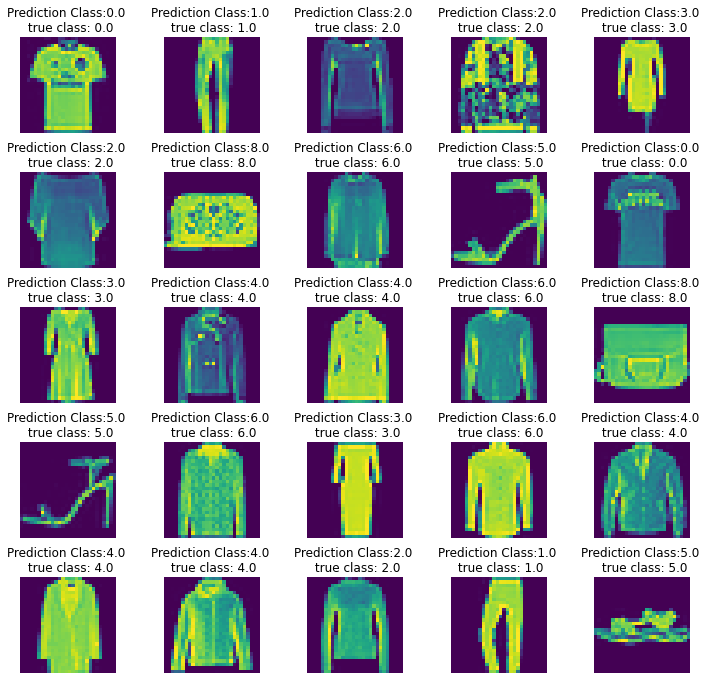

In [61]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)  

In [62]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.78      0.87      0.83      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.81      0.80      0.80      1000
     Class 3       0.91      0.90      0.91      1000
     Class 4       0.73      0.89      0.81      1000
     Class 5       0.96      0.95      0.96      1000
     Class 6       0.74      0.51      0.60      1000
     Class 7       0.93      0.94      0.94      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000

